<a href="https://colab.research.google.com/github/KathrynKashitsyn/Natural-Gas-Marketing-in-Brazil/blob/main/Brazil_Gas_Sales_by_Suppliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will do exploratory data analysis and data visualization of Natural Gas Marketing in Brazil, sales of natural gas to local natural gas distribution companies or free consumers authorized by the states to purchase natural gas directly from selling agents. The data contains information on average prices weighted by volumes sold, as well as the volumes sold themselves by year and months.



Original source: https://dados.gov.br/dados/conjuntos-dados/comercializacao-de-gas-natural

## Key Questions to Answer
Trends: Are prices increasing over time? Is there seasonality?

Regional Differences: Which regions have the highest volatility?

Outliers: Are extreme prices tied to specific events or regions?

Market Dynamics: Do thermal/non-thermal prices behave differently?

## Data Exploration

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The original CSV file can be only downloaded and is not directly accessible through Brazilian Open Datasets website. Thus, it was saved on GitHub.

In [3]:
url = "https://raw.githubusercontent.com/KathrynKashitsyn/Natural-Gas-Marketing-in-Brazil/refs/heads/main/PT%20distribuidoras-consumidores-livres.csv"

# Read with correct delimiter
sales_df = pd.read_csv(url, sep=";", decimal=",")


Let's see what first rows look like

In [4]:
#sales_df - sales data dataframe
sales_df.head()

,Ano,Mês,TipoMercado,RegiãoAgregada,Preço em Reais por MMBtu,Volume em mil metros cúbicos dia
0,2019,9,Térmico,Norte-Nordeste,18.9,15908
1,2019,9,Não Térmico,Norte-Nordeste,49.3,7159
2,2019,9,Não Térmico,Sudeste,48.8,26028
3,2019,9,Térmico,Sudeste-Sul-Centro-Oeste,18.8,10520
4,2019,9,Não Térmico,Sul-Centro-Oeste,40.1,5726


And the end of the dataset

In [67]:
sales_df.tail(10)

,Ano,Mês,TipoMercado,RegiãoAgregada,Preço em Reais por MMBtu,Volume em mil metros cúbicos dia
289,2024,7,Não Térmico,Norte-Nordeste,63.8,9380
290,2024,7,Não Térmico,Sudeste,75.5,24807
291,2024,7,Não Térmico,Sul-Centro-Oeste,73.5,4524
292,2024,7,Térmico,Norte-Nordeste,NaN,10002
293,2024,7,Térmico,Sudeste-Sul-Centro-Oeste,NaN,1969
294,2024,8,Não Térmico,Norte-Nordeste,65.1,8989
295,2024,8,Não Térmico,Sudeste,81.1,25157
296,2024,8,Não Térmico,Sul-Centro-Oeste,78.1,4564
297,2024,8,Térmico,Norte-Nordeste,NaN,11933
298,2024,8,Térmico,Sudeste-Sul-Centro-Oeste,NaN,2626


The information is provided in the language of the country of origin. The target reader is English-speaking, so we should translate all text (strings) data into English

In [5]:
# Translate Column Headings

column_translations = {
    "Ano": "Year",
    "Mês": "Month",
    "TipoMercado": "MarketType",
    "RegiãoAgregada": "Region",
    "Preço em Reais por MMBtu": "Price (Reals per MMBtu)",
    "Volume em mil metros cúbicos dia": "Volume (1.000 m³/Day)"
}

# Rename columns
sales_df_english = sales_df.rename(columns=column_translations)

We got the column headings translated first as this text was obvious from `df.head()` code. Now, its time to translate all categorical string values.

In [6]:
# get the names of Market categories (Portugues)

unique_market = sales_df['TipoMercado'].unique()
print(unique_market)

['Térmico' 'Não Térmico']


In [7]:
# get the names of specific Region categories (Portugues)

unique_regions = sales_df['RegiãoAgregada'].unique()
print(unique_regions)

['Norte-Nordeste' 'Sudeste' 'Sudeste-Sul-Centro-Oeste' 'Sul-Centro-Oeste']


In [8]:
# Translate specific categories
sales_df_english["MarketType"] = sales_df_english["MarketType"].map({
    "Térmico": "Thermal",
    "Não Térmico": "NonThermal"
})

# Translate regions (if needed)
sales_df_english["Region"] = sales_df_english["Region"].map({
    "Norte-Nordeste": "North-Northeast",
    "Sudeste": "Southeast",
    "Sudeste-Sul-Centro-Oeste": "Southeast-South-CentralWest",
    "Sul-Centro-Oeste": "South-CentralWest"
})

Check the updated dataframe

In [9]:
sales_df_english.head()

,Year,Month,MarketType,Region,Price (Reals per MMBtu),Volume (1.000 m³/Day)
0,2019,9,Thermal,North-Northeast,18.9,15908
1,2019,9,NonThermal,North-Northeast,49.3,7159
2,2019,9,NonThermal,Southeast,48.8,26028
3,2019,9,Thermal,Southeast-South-CentralWest,18.8,10520
4,2019,9,NonThermal,South-CentralWest,40.1,5726


## Standatization and cleaning

To perform further analysis it's necessary to standardize DataFrame data types

In [10]:
#sales_df - sales data dataframe
sales_df_english.dtypes

,0
Year,int64
Month,int64
MarketType,object
Region,object
Price (Reals per MMBtu),float64
Volume (1.000 m³/Day),int64


In [11]:
# Convert all numeric columns to consistent types

sales_df_english_upd = sales_df_english.convert_dtypes()
sales_df_english_upd.dtypes

,0
Year,Int64
Month,Int64
MarketType,string[python]
Region,string[python]
Price (Reals per MMBtu),Float64
Volume (1.000 m³/Day),Int64


In [12]:
# Convert object columns to category type if they have <50% unique values
sales_df_english_upd['MarketType'] = sales_df_english_upd['MarketType'].astype('category')
sales_df_english_upd['Region'] = sales_df_english_upd['Region'].astype('category')

sales_df_english_upd.dtypes

,0
Year,Int64
Month,Int64
MarketType,category
Region,category
Price (Reals per MMBtu),Float64
Volume (1.000 m³/Day),Int64


We should concatenate the 'Year' and 'Month'

In [23]:
# Convert year and month to datetime
sales_df_english_upd['Date'] = pd.to_datetime(
    sales_df_english_upd[['Year', 'Month']].assign(Day=1).rename(columns={
        'Year': 'year',
        'Month': 'month',
        'Day': 'day'
    })
)

# Step 1: Get the position of 'Year' (to insert 'Date' later)
col_position = sales_df_english_upd.columns.get_loc('Year')

# Step 2: Drop 'Year' and 'Month' while keeping 'Date'
sales_df_english_upd = sales_df_english_upd.drop(columns=['Year', 'Month'])

# Step 3: Insert 'Date' where 'Year' was originally
sales_df_english_upd.insert(col_position, 'Date', sales_df_english_upd.pop('Date'))

sales_df_english_upd.head()

,Date,MarketType,Region,Price (Reals per MMBtu),Volume (1.000 m³/Day)
0,2019-09-01,Thermal,North-Northeast,18.9,15908
1,2019-09-01,NonThermal,North-Northeast,49.3,7159
2,2019-09-01,NonThermal,Southeast,48.8,26028
3,2019-09-01,Thermal,Southeast-South-CentralWest,18.8,10520
4,2019-09-01,NonThermal,South-CentralWest,40.1,5726


In [24]:
sales_df_english_upd.dtypes

,0
Date,datetime64[ns]
MarketType,category
Region,category
Price (Reals per MMBtu),Float64
Volume (1.000 m³/Day),Int64


At this stage the dataset is ready for cleaning:
- check for duplicates
- check for NULL values


In [25]:
# Count total duplicate rows
duplicate_rows = sales_df_english_upd.duplicated().sum()
print(f"Total duplicate rows: {duplicate_rows}")

# Show duplicate rows (keeping all occurrences)
duplicates = sales_df_english_upd[sales_df_english_upd.duplicated(keep=False)]
print("Duplicate rows:")
display(duplicates.sort_values(by=sales_df_english_upd.columns.tolist()))

# Remove duplicates (keeping first occurrence)
df_clean = sales_df_english_upd.drop_duplicates()

Total duplicate rows: 0
Duplicate rows:


,Date,MarketType,Region,Price (Reals per MMBtu),Volume (1.000 m³/Day)


In [14]:
# Check total missing values per column
print("Missing values per column:")
print(df_clean.isnull().sum())

Missing values per column:
Year                        0
Month                       0
MarketType                  0
Region                      0
Price (Reals per MMBtu)    46
Volume (1.000 m³/Day)       0
dtype: int64


In [65]:
df_clean[df_clean.isnull().any(axis=1)]

,Date,MarketType,Region,Price (Reals per MMBtu),Volume (1.000 m³/Day)
150,2022-03-01,Thermal,North-Northeast,<NA>,3831
163,2022-05-01,Thermal,Southeast-South-CentralWest,<NA>,537
168,2022-06-01,Thermal,Southeast-South-CentralWest,<NA>,154
173,2022-07-01,Thermal,Southeast-South-CentralWest,<NA>,350
182,2022-09-01,Thermal,Southeast-South-CentralWest,<NA>,864
188,2022-10-01,Thermal,Southeast-South-CentralWest,<NA>,843
193,2022-11-01,Thermal,Southeast-South-CentralWest,<NA>,926
196,2022-12-01,Thermal,North-Northeast,<NA>,9722
198,2022-12-01,Thermal,Southeast-South-CentralWest,<NA>,1214
201,2023-01-01,Thermal,North-Northeast,<NA>,6944


There are 46 'NULL' cells. First, we need to covert them into NaN. Then, for us to determine what to do whith those we need to get a complete picture of the 'Price' statistics.

In [89]:
# Convert 'Price' to numeric, coercing errors (e.g., strings) to NaN
df_clean.loc[:, 'Price (Reals per MMBtu)'] = pd.to_numeric(
    df_clean['Price (Reals per MMBtu)'],
    errors='coerce'
)
df_clean.dtypes

,0
Date,datetime64[ns]
MarketType,category
Region,category
Price (Reals per MMBtu),Float64
Volume (1.000 m³/Day),Int64


In [26]:
price_col = df_clean['Price (Reals per MMBtu)']

# Summary statistics
print(price_col.describe())

count        253.0
mean     55.151383
std      27.781739
min           16.2
25%           34.5
50%           49.4
75%           75.5
max          285.5
Name: Price (Reals per MMBtu), dtype: Float64


In 'Price' statistics we can see values which stand out from min, mean and 4th quartile values and can skew the results.

In [44]:
# Check for prices above the Q3 (75.5)
outliers = df_clean[df_clean['Price (Reals per MMBtu)'] > 75.5]
outliers.sort_values(by='Price (Reals per MMBtu)', ascending=False)

,Date,MarketType,Region,Price (Reals per MMBtu),Volume (1.000 m³/Day)
177,2022-08-01,Thermal,Southeast-South-CentralWest,285.5,917
178,2022-08-01,NonThermal,South-CentralWest,110.3,5125
183,2022-09-01,NonThermal,South-CentralWest,107.8,4972
167,2022-06-01,NonThermal,South-CentralWest,105.8,5379
162,2022-05-01,NonThermal,South-CentralWest,105.8,5287
...,...,...,...,...,...
199,2023-01-01,NonThermal,North-Northeast,76.2,11293
270,2024-03-01,NonThermal,Southeast,76.2,22520
225,2023-06-01,NonThermal,Southeast,76.1,25483
272,2024-03-01,NonThermal,South-CentralWest,75.6,4056


In [39]:
max_outlier = df_clean[df_clean['Price (Reals per MMBtu)'] == 285.5]
max_outlier

,Date,MarketType,Region,Price (Reals per MMBtu),Volume (1.000 m³/Day)
177,2022-08-01,Thermal,Southeast-South-CentralWest,285.5,917


Since we identified the outlier, we should check historical events for August 2022 in that region (natural gas price spikes, supply disruptions, etc.)

Compare with neighboring regions' prices for the same date

In [46]:
df_clean[df_clean['Date'] == '2022-08-01'].sort_values('Price (Reals per MMBtu)', ascending=False)

,Date,MarketType,Region,Price (Reals per MMBtu),Volume (1.000 m³/Day)
177,2022-08-01,Thermal,Southeast-South-CentralWest,285.5,917
178,2022-08-01,NonThermal,South-CentralWest,110.3,5125
176,2022-08-01,NonThermal,Southeast,96.0,27075
174,2022-08-01,NonThermal,North-Northeast,86.7,11105
175,2022-08-01,Thermal,North-Northeast,23.7,9096


In [49]:
df_clean[df_clean['Region'] == 'Southeast-South-CentralWest'].sort_values('Price (Reals per MMBtu)', ascending=False).head(10)

,Date,MarketType,Region,Price (Reals per MMBtu),Volume (1.000 m³/Day)
177,2022-08-01,Thermal,Southeast-South-CentralWest,285.5,917
128,2021-10-01,Thermal,Southeast-South-CentralWest,82.5,10193
122,2021-09-01,Thermal,Southeast-South-CentralWest,72.8,4976
133,2021-11-01,Thermal,Southeast-South-CentralWest,64.1,9540
143,2022-01-01,Thermal,Southeast-South-CentralWest,60.3,8416
117,2021-08-01,Thermal,Southeast-South-CentralWest,52.3,8937
112,2021-07-01,Thermal,Southeast-South-CentralWest,46.1,10276
138,2021-12-01,Thermal,Southeast-South-CentralWest,45.3,7056
148,2022-02-01,Thermal,Southeast-South-CentralWest,44.5,7381
158,2022-04-01,Thermal,Southeast-South-CentralWest,43.5,669


In [68]:
# Define the outlier date and time window
outlier_date = pd.to_datetime('2022-08-01')
max_date = df_clean['Date'].max()
start_date = outlier_date - pd.DateOffset(months=5)
end_date = max_date

# Filter the region and date range, then sort by price
region_data = df_clean[
    (df_clean['Region'] == 'Southeast-South-CentralWest') &
    (df_clean['Date'] >= start_date) &
    (df_clean['Date'] <= end_date)
]

# Display top 10 highest prices in this period
region_data

,Date,MarketType,Region,Price (Reals per MMBtu),Volume (1.000 m³/Day)
153,2022-03-01,Thermal,Southeast-South-CentralWest,31.1,3228
158,2022-04-01,Thermal,Southeast-South-CentralWest,43.5,669
163,2022-05-01,Thermal,Southeast-South-CentralWest,<NA>,537
168,2022-06-01,Thermal,Southeast-South-CentralWest,<NA>,154
173,2022-07-01,Thermal,Southeast-South-CentralWest,<NA>,350
177,2022-08-01,Thermal,Southeast-South-CentralWest,285.5,917
182,2022-09-01,Thermal,Southeast-South-CentralWest,<NA>,864
188,2022-10-01,Thermal,Southeast-South-CentralWest,<NA>,843
193,2022-11-01,Thermal,Southeast-South-CentralWest,<NA>,926
198,2022-12-01,Thermal,Southeast-South-CentralWest,<NA>,1214


The outlying price is likely an anomaly or data error, not a genuine market price due to:
- **Massive Price Difference**. 285.5 vs. neighboring regions' prices (86.7-110.3) on the same day. 3-6× higher than other regions in the Southeast-South-CentralWest area.

- **Volume Anomaly**. 917 m³/day is significantly lower than typical volumes for this region (usually 5,000-10,000 m³/day).Low volume + extreme price suggests a possible unit error (e.g., misplaced decimal)

- **Historical Context**. The next highest price in this region was 82.5 (Oct 2021). No gradual buildup to justify a sudden 3.5× price spike.

Based on that we can remove the outlier

In [73]:
# Drop the row where Price = 285.5 (exact match)
df_clean = df_clean[df_clean['Price (Reals per MMBtu)'] != 285.5]
# Check if the outlier still exists
max_price = df_clean['Price (Reals per MMBtu)'].max()
print(f"New max price: {max_price}")  # Should now be <= 110.3 (from your earlier data)

New max price: 110.3


# Plotting

1. Time Series Analysis

/tmp/ipython-input-4014048918.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (region, market_type), group in df_clean.groupby(['Region', 'MarketType']):


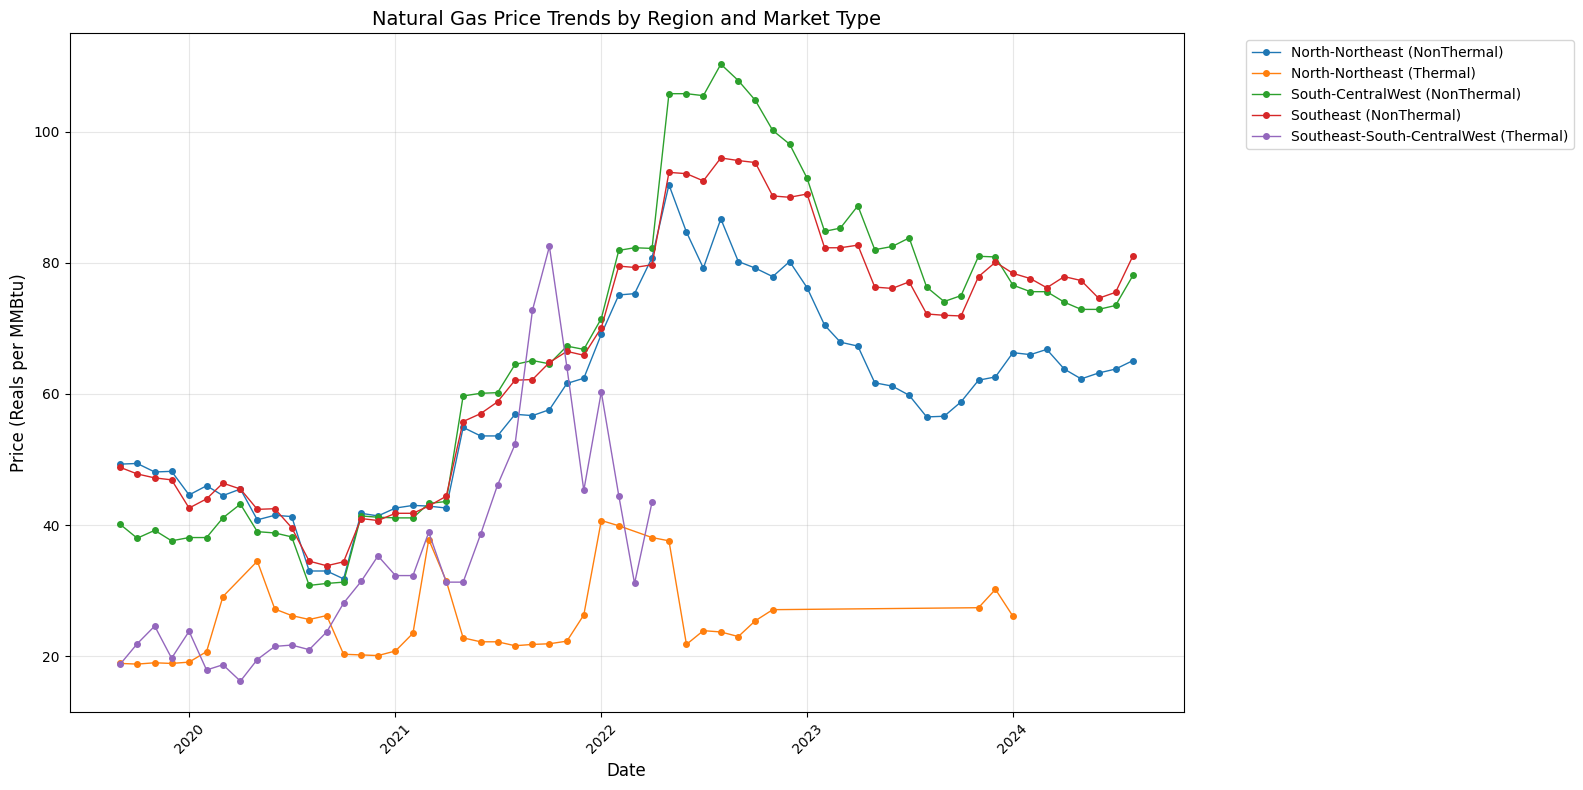

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

# Group by Region and MarketType
for (region, market_type), group in df_clean.groupby(['Region', 'MarketType']):
    plt.plot(
        group['Date'],
        group['Price (Reals per MMBtu)'],
        marker='o',
        markersize=4,
        linestyle='-',
        linewidth=1,
        label=f"{region} ({market_type})"
    )

plt.title('Natural Gas Price Trends by Region and Market Type', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (Reals per MMBtu)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Regional Comparisons

Boxplot by region for comparison of price distributions across regions and identify regional outliers.

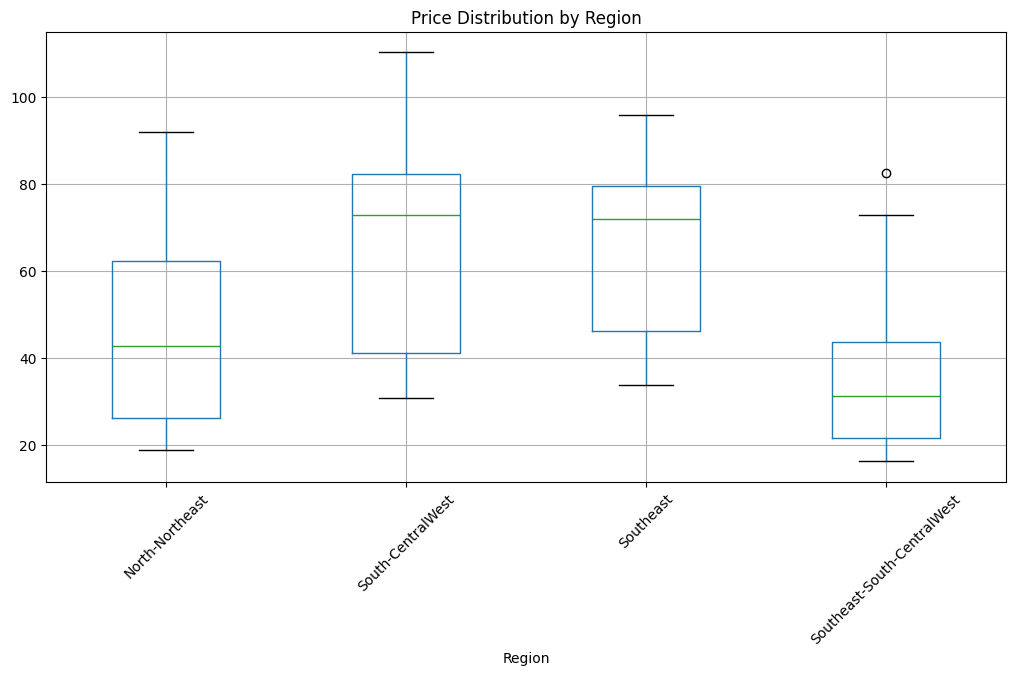

In [77]:
df_clean.boxplot(column='Price (Reals per MMBtu)', by='Region', figsize=(12, 6), rot=45)
plt.title('Price Distribution by Region')
plt.suptitle('')  # Remove default subtitle
plt.show()

3. Market Type Analysis

Price by MarketType (Thermal vs. Non-Thermal)
Compare prices between thermal and non-thermal markets.

/tmp/ipython-input-635534954.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby('MarketType')['Price (Reals per MMBtu)'].mean().plot(kind='bar')


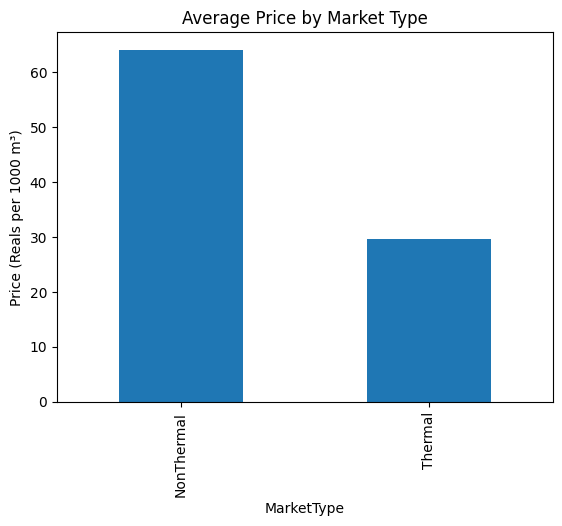

In [79]:
df_clean.groupby('MarketType')['Price (Reals per MMBtu)'].mean().plot(kind='bar')
plt.title('Average Price by Market Type')
plt.ylabel('Price (Reals per 1000 m³)')
plt.show()

Heatmap (Price vs. Region + Time)

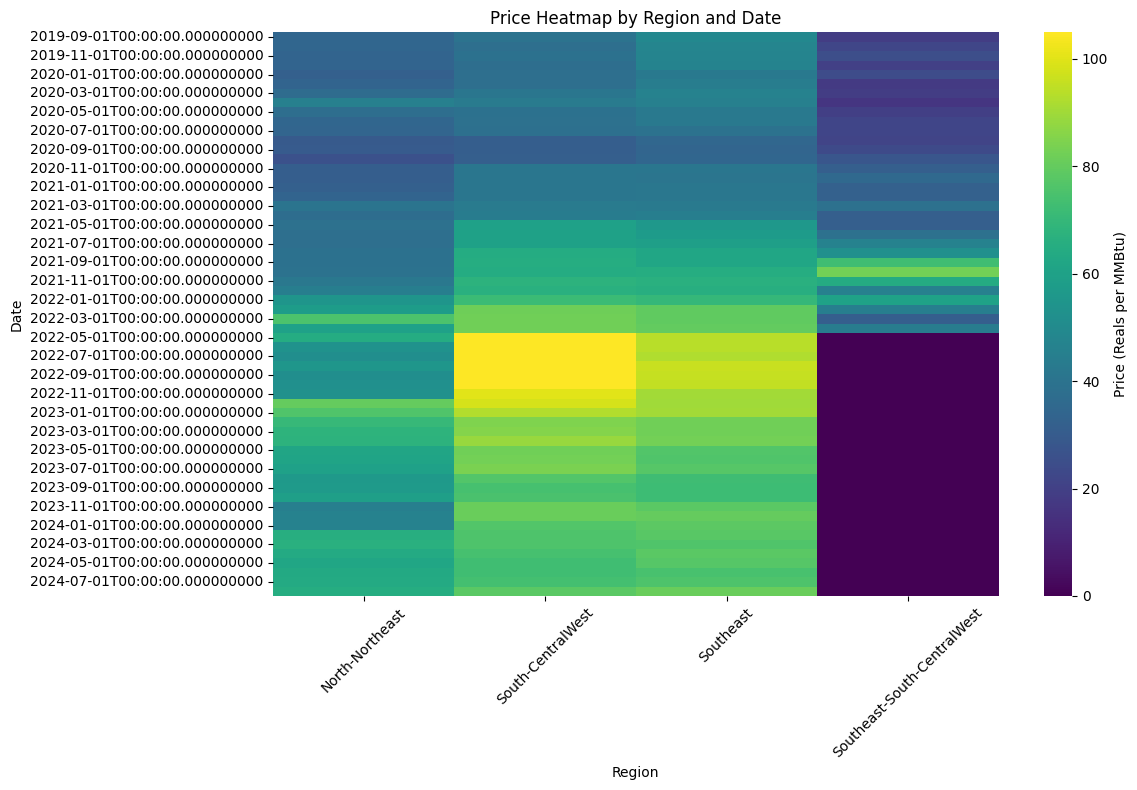

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Safely convert price column to numeric
df_clean.loc[:, 'Price (Reals per MMBtu)'] = pd.to_numeric(
    df_clean['Price (Reals per MMBtu)'],
    errors='coerce'
)

# 2. Create pivot table and fill NA values
pivot = df_clean.pivot_table(
    values='Price (Reals per MMBtu)',
    index='Date',
    columns='Region',
    observed=True
).fillna(0)  # Fill NA with 0 or use .dropna() to remove

# 3. Convert all values to float explicitly
pivot = pivot.astype(float)

# 4. Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot,
    cmap='viridis',
    robust=True,  # Helps with outlier values
    cbar_kws={'label': 'Price (Reals per MMBtu)'},
    vmin=0  # Set minimum value to 0
)
plt.title('Price Heatmap by Region and Date')
plt.xlabel('Region')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Southeast-South-CentralWest is consistently darker than other regions → This region may have chronic supply issues.

August 2022 shows a dark cell across all regions → Likely a market-wide event (e.g., LNG export surge).



# MERGE THE DATASETS

We need to merge the datasets to get the overall idea of how prices correlate between two groups: producers and distributors.
Then identify the end market margit for the price.